# import necessary libraries

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
alien_images = os.listdir('/content/drive/MyDrive/datasets/deeplearning/data/train/alien')
predator_images = os.listdir('/content/drive/MyDrive/datasets/deeplearning/data/train/predator')

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [26]:
from IPython.display import display
from IPython.display import Image as _Imgdis

#Displaying the images

Working with 347 images
Image examples: 
207.jpg


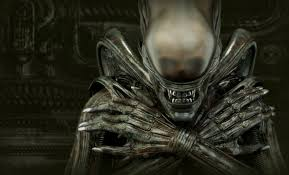

205.jpg


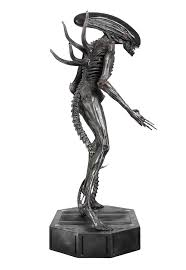

193.jpg


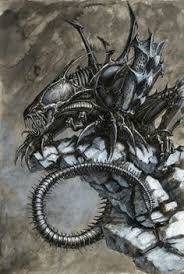

135.jpg


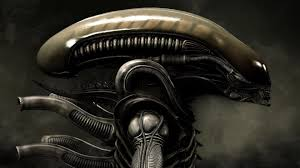

211.jpg


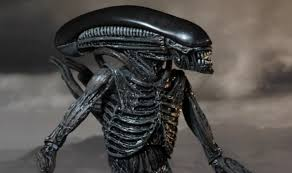

108.jpg


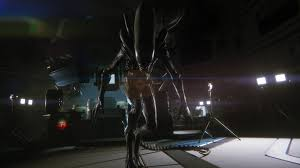

179.jpg


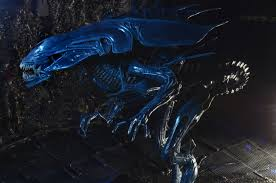

102.jpg


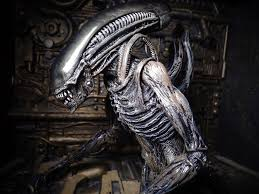

177.jpg


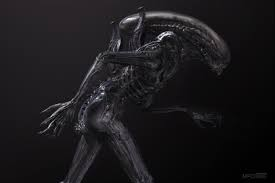

159.jpg


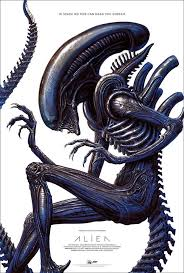

In [27]:
folder = '/content/drive/MyDrive/datasets/deeplearning/data/train/alien'


onlyalienfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyalienfiles)))
print("Image examples: ")


for i in range(10):
    print(onlyalienfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyalienfiles[i], width=240, height=240))

Working with 347 images
Image examples: 
270.jpg


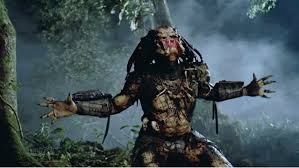

296.jpg


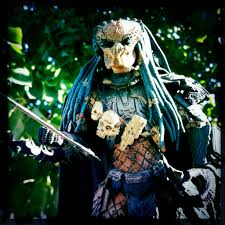

285.jpg


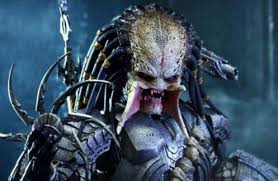

275.jpg


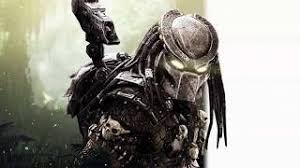

276.jpg


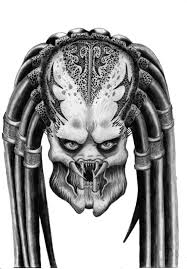

139.jpg


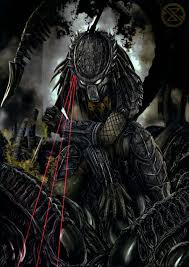

91.jpg


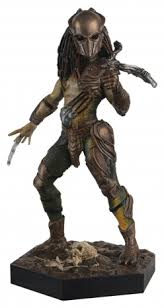

79.jpg


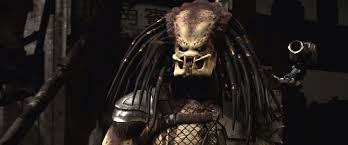

77.jpg


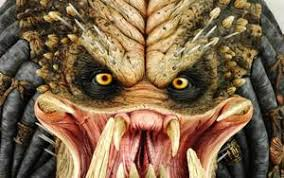

34.jpg


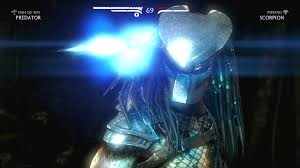

In [28]:
folder = '/content/drive/MyDrive/datasets/deeplearning/data/train/predator'


onlypredatorfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlypredatorfiles)))
print("Image examples: ")


for i in range(10):
    print(onlypredatorfiles[i])
    display(_Imgdis(filename=folder + "/" + onlypredatorfiles[i], width=240, height=240))

In [4]:
num_classes = 2
image_resize = 224
batch_size_training = 100
batch_size_validation = 100

# Data augumentation

In [5]:

data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [6]:
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/datasets/deeplearning/data/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')


Found 694 images belonging to 2 classes.


In [7]:
validation_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/datasets/deeplearning/data/validation',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 200 images belonging to 2 classes.


# Building RESNET50 model

In [8]:
model = Sequential()

In [9]:

model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.layers[0].trainable = False


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [16]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
7/7 [==============================] - 528s 86s/step - loss: 0.7333 - accuracy: 0.6305 - val_loss: 0.4234 - val_accuracy: 0.8150
Epoch 2/2
7/7 [==============================] - 4s 510ms/step - loss: 0.3652 - accuracy: 0.8361 - val_loss: 0.2792 - val_accuracy: 0.8850


# Building VGG16 model

In [17]:
from keras.applications.vgg16 import VGG16

In [18]:
model_vgg = Sequential()

In [19]:
model_vgg.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))


58892288/58889256 [==============================] - 1s 0us/step


In [20]:
model_vgg.add(Dense(num_classes, activation='softmax'))

In [21]:
model_vgg.layers[0].trainable = False

In [22]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:

fit_history_vgg = model_vgg.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 4s 611ms/step - loss: 0.7756 - accuracy: 0.7896 - val_loss: 0.8054 - val_accuracy: 0.7900
Epoch 2/10
7/7 [==============================] - 4s 553ms/step - loss: 0.5679 - accuracy: 0.8386 - val_loss: 0.6844 - val_accuracy: 0.7950
Epoch 3/10
7/7 [==============================] - 4s 559ms/step - loss: 0.4560 - accuracy: 0.8732 - val_loss: 0.6118 - val_accuracy: 0.8200
Epoch 4/10
7/7 [==============================] - 4s 552ms/step - loss: 0.3948 - accuracy: 0.8919 - val_loss: 0.5638 - val_accuracy: 0.8300
Epoch 5/10
7/7 [==============================] - 4s 561ms/step - loss: 0.3555 - accuracy: 0.9006 - val_loss: 0.5197 - val_accuracy: 0.8250
Epoch 6/10
7/7 [==============================] - 4s 550ms/step - loss: 0.3411 - accuracy: 0.9020 - val_loss: 0.5271 - val_accuracy: 0.8400
Epoch 7/10
7/7 [==============================] - 4s 555ms/step - loss: 0.2767 - accuracy: 0.9222 - val_loss: 0.4677 - val_accuracy: 0.8350
Epoch 8/10
7/7 [====

# generating predictions

In [33]:
result=model_vgg.predict_generator(train_generator,steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [34]:
result

array([[9.9999976e-01, 2.5550389e-07],
       [1.1323128e-03, 9.9886775e-01],
       [1.1261344e-01, 8.8738656e-01],
       ...,
       [2.2030677e-06, 9.9999785e-01],
       [1.0000000e+00, 5.4125190e-12],
       [8.3926022e-01, 1.6073976e-01]], dtype=float32)

In [35]:
for i in range(1,500,100):
  if result[i][0]>result[i][1]:
    print("alien")
  else:
    print("predator")

predator
predator
predator
alien
predator
